**Project: Predict Fare of Airlines Tickets using Machine Learning**

---


 The steps involved in a typical data science project lifecycle and the common challenges faced during each phase. Here's a high-level overview of how you can address these challenges:

1. **Data Collection:**
   - Identify relevant data sources and collect the required data.
   - Ensure data quality and consistency by verifying data sources and handling missing or incomplete data.

2. **Data Cleaning / Data Preparation / Data Pre-processing:**
   - Clean the data by handling missing values, outliers, and inconsistencies.
   - Preprocess the data by scaling, normalizing, or transforming features as needed.
   - Split the data into training and testing sets to prepare for model training and evaluation.

3. **Data Visualization (EDA - Exploratory Data Analysis):**
   - Visualize the data to gain insights into patterns, trends, and relationships.
   - Identify correlations between features and the target variable.
   - Use various visualization techniques such as histograms, scatter plots, and heatmaps.

4. **Feature Engineering:**
   - Create new features or transform existing ones to improve model performance.
   - Perform feature encoding to convert categorical variables into numerical representations.
   - Identify and handle outliers using appropriate techniques such as trimming or transformations.
   - Select relevant features or determine feature importance using methods like correlation analysis or feature selection algorithms.

5. **Build Machine Learning Model:**
   - Choose appropriate machine learning algorithms based on the nature of the problem (e.g., classification, regression).
   - Train the model using the training dataset and evaluate its performance using metrics such as accuracy, precision, recall, or RMSE (Root Mean Squared Error).
   - Fine-tune hyperparameters to optimize model performance.
   - Validate the model using cross-validation to ensure robustness and generalization.

6. **Automate ML Pipeline:**
   - Streamline the entire data science workflow by automating repetitive tasks and integrating different components into a pipeline.
   - Use tools like Apache Airflow or Prefect to schedule and orchestrate the pipeline execution.

7. **Hypertune ML Model along with Cross Validation:**
   - Conduct hyperparameter tuning to optimize model performance further.
   - Use techniques such as grid search, random search, or Bayesian optimization to search for the best hyperparameters.
   - Perform cross-validation to assess the model's performance on different subsets of the data and reduce the risk of overfitting.

By following these steps and addressing the challenges encountered at each stage of the data science project lifecycle, we can develop robust and effective machine learning models for various real-world applications.

# 1. Data Collection

In [108]:
# import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [109]:
# Importing dataset
# Since data is in the form of an Excel file, we have to use pandas read_excel to load the data
train_df = pd.read_excel('Data_Train.xlsx')

In [110]:
train_df.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897


In [111]:
train_df.tail(1)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


# 2. Data Cleaning / Data Preparation / Data Pre-processing:

In [112]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [113]:
# Check for missing values
missing_values = train_df.isnull().sum()
missing_values

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [114]:
train_df['Total_Stops'].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
10678    False
10679    False
10680    False
10681    False
10682    False
Name: Total_Stops, Length: 10683, dtype: bool

In [115]:
train_df[train_df['Total_Stops'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [116]:
# We have 1 missing value and Route here , I can directly drop that
train_df.dropna(inplace=True)

In [117]:
train_df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [118]:
# Using memory_usage="deep" in the info() method of a DataFrame allows for a more accurate estimation of memory usage, especially when dealing with object (string) data types
train_df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 7.4 MB


Data Pre-process & extract Derived attributes from *Date_of_Journey*

In [119]:
df = train_df.copy()

In [120]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [121]:
df.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897


In [122]:
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

 Converting the `Date_of_Journey,
 Dep_Time, Arrival_Time` column from object datatype to datetime datatype is crucial for proper analysis and model building.

In pandas, datetime values can be represented using different data types, including `datetime64[ns]`, `datetime64[ns, tz]`, `datetime64[ns, UTC]`, and `dtype('<M8[ns]')`. Here's a brief explanation of these data types:

1. **datetime64[ns]**: This is the most common representation of datetime in pandas. It represents datetime values with nanosecond precision (`ns`). It does not include timezone information.

2. **datetime64[ns, tz]**: This data type represents datetime values with timezone information (`tz`). It includes both nanosecond precision (`ns`) and timezone (`tz`) information.

3. **datetime64[ns, UTC]**: Similar to `datetime64[ns, tz]`, but specifically represents datetime values in Coordinated Universal Time (UTC).

4. **dtype('<M8[ns]')**: This is a specific dtype representation of datetime values, where `<` indicates little-endian byte order, `M8` indicates datetime dtype, and `[ns]` indicates nanosecond precision.

The statement `np.dtype('datetime64[ns]') == np.dtype('<M8[ns]')` evaluates to `True`, indicating that both representations (`datetime64[ns]` and `<M8[ns]`) are equivalent and can be used interchangeably in pandas.

In practice, we will mostly encounter `datetime64[ns]` when working with datetime values in pandas, but it's good to be aware of these variations in data types.

In [123]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [124]:
# Convert Date_of_Journey, Dep_Time, and Arrival_Time columns to datetime datatype
def change_into_DateTime(df, col):
  df[col]=pd.to_datetime(df[col])

In [125]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [126]:
# Columns to convert
columns_to_convert = ['Date_of_Journey',  'Dep_Time', 'Arrival_Time']

# Convert columns to datetime
for columns in columns_to_convert:
  change_into_DateTime(df, columns)

In [127]:
# # # Alternative way
# # Convert "Date_of_Journey" column to datetime datatype
# df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'])

# # Extract day, month, and year into separate columns
# df['Journey_Day'] = df['Date_of_Journey'].dt.day
# df['Journey_Month'] = df['Date_of_Journey'].dt.month
# df['Journey_Year'] = df['Date_of_Journey'].dt.year

In [128]:
df.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [129]:
# Extract day, month, and year from Date_of_Journey column
df['Journey_day'] = df['Date_of_Journey'].dt.day
df['Journey_month'] = df['Date_of_Journey'].dt.month
df['Journey_year'] = df['Date_of_Journey'].dt.year
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-04-06 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-04-06 05:50:00,2024-04-06 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019


Lets clean Dep_Time & Arrival_Time & then extract Derived attributes

In [130]:
df['Dep_Time']

0       2024-04-06 22:20:00
1       2024-04-06 05:50:00
2       2024-04-06 09:25:00
3       2024-04-06 18:05:00
4       2024-04-06 16:50:00
                ...        
10678   2024-04-06 19:55:00
10679   2024-04-06 20:45:00
10680   2024-04-06 08:20:00
10681   2024-04-06 11:30:00
10682   2024-04-06 10:55:00
Name: Dep_Time, Length: 10682, dtype: datetime64[ns]

In [131]:
df['Arrival_Time']

0       2024-03-22 01:10:00
1       2024-04-06 13:15:00
2       2024-06-10 04:25:00
3       2024-04-06 23:30:00
4       2024-04-06 21:35:00
                ...        
10678   2024-04-06 22:25:00
10679   2024-04-06 23:20:00
10680   2024-04-06 11:20:00
10681   2024-04-06 14:10:00
10682   2024-04-06 19:15:00
Name: Arrival_Time, Length: 10682, dtype: datetime64[ns]

In [132]:
def extract_hour_min(data, col):
  data[col+'_hour'] = data[col].dt.hour
  data[col+'_min'] = data[col].dt.minute

In [133]:
columns_to_convert2 = ['Dep_Time', 'Arrival_Time']

for columns2 in columns_to_convert2:
  extract_hour_min(df, columns2)

In [134]:
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-04-06 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-04-06 05:50:00,2024-04-06 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15


In [135]:
## we have xtracted derived attributes from ['Arrival_Time' , "Dep_Time"] ,lets drop both these features now
#Define columns to drop
col_to_drop = ['Arrival_Time', 'Dep_Time']

df.drop(col_to_drop, axis=1, inplace=True)

df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15


# 3. Data Visualization (EDA - Exploratory Data Analysis)

In [136]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_day',
       'Journey_month', 'Journey_year', 'Dep_Time_hour', 'Dep_Time_min',
       'Arrival_Time_hour', 'Arrival_Time_min'],
      dtype='object')

Converting the flight Dep_Time into proper time like mid_night, morning, Noon, night, late night


In [137]:
def flight_dep_time(x):
  '''
  This function takes the flight Departure time
  and converts it into appropriate format.
  '''
  if (x > 4) and (x <= 8):
    return 'Early Morning'
  elif (x > 8) and (x <=12):
    return 'Morning'
  elif (x > 12) and (x <= 16):
    return 'Noon'
  elif (x > 16) and (x <= 20):
    return 'Evening'
  elif (x > 20) and (x <= 24):
    return 'Night'
  else:
    return 'Late Night'

<Axes: xlabel='Dep_Time_hour'>

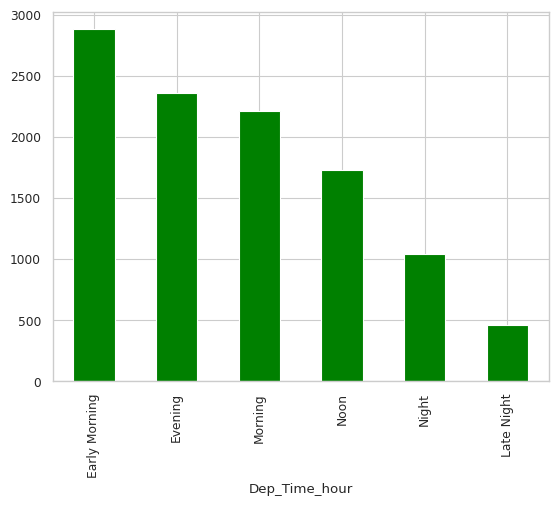

In [138]:
df['Dep_Time_hour'].apply(flight_dep_time).value_counts().plot(kind='bar', color='g')

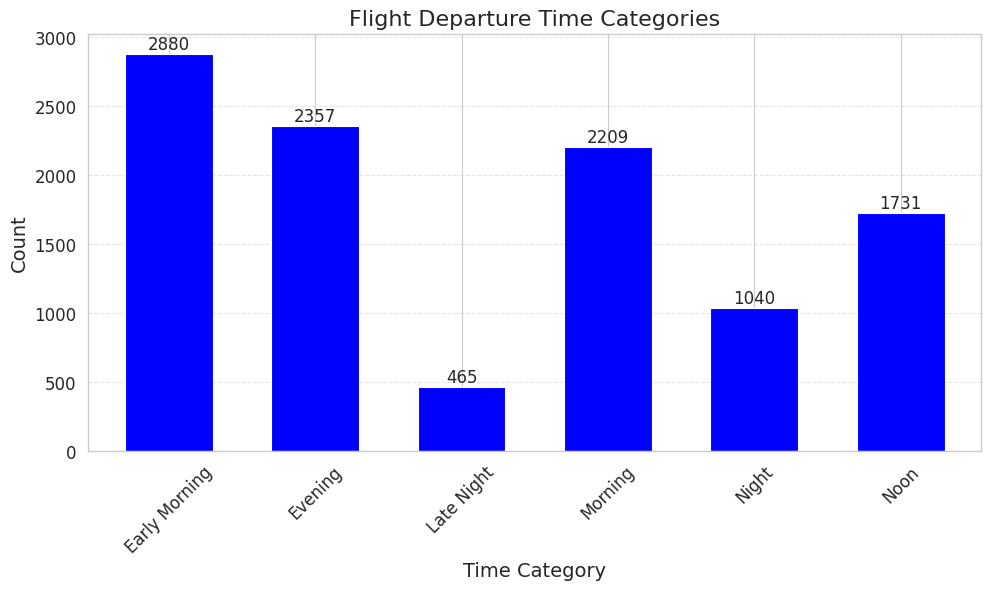

In [139]:
# for more interactive Plotting
plt.figure(figsize=(10, 6))
flight_time_counts = df['Dep_Time_hour'].apply(flight_dep_time).value_counts().sort_index()
flight_time_counts.plot(kind='bar', color='b', width=0.6)

# Customizing the plot
plt.title("Flight Departure Time Categories", fontsize=16)
plt.xlabel("Time Category", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Annotate bars with counts
for index, value in enumerate(flight_time_counts):
    plt.text(index, value + 0.2, str(value), ha='center', va='bottom', fontsize=12)

# Show plot
plt.tight_layout()
plt.savefig('flight_departure_time_categories.png')

plt.show()


# 4. Feature Engineering
Pre-process Duration Feature & extract meaningful features from it

In [140]:
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15


 We need to pre-process our Duration feature , lets extract Duration hours and minutes

In [141]:
df['Duration']

0        2h 50m
1        7h 25m
2           19h
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680        3h
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10682, dtype: object

In [142]:
def duration_process(x):
  if 'h' not in x:
    x = '0h ' + x
  elif 'm' not in x:
    x = x + ' 0m'
  return x

In [143]:
df['Duration'] = df['Duration'].apply(duration_process)
df['Duration']

0        2h 50m
1        7h 25m
2        19h 0m
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680     3h 0m
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10682, dtype: object

In [144]:
df['Duration'][0].split(' ')

['2h', '50m']

In [145]:
df['Duration'][0].split(' ')[0]

'2h'

In [146]:
df['Duration'][0].split(' ')[0][0:-1]

'2'

In [147]:
type(df['Duration'][0].split(' ')[0][0:-1])

str

In [148]:
int(df['Duration'][0].split(' ')[0][0:-1])

2

In [149]:
int(df['Duration'][0].split(' ')[1][0:-1])

50

To convert the preprocessed duration strings into numerical values (integer or float),
you can use a lambda function with the apply() method along with string manipulation techniques

In [150]:
df['Duration_hour'] = df['Duration'].apply(lambda x : int(x.split(' ')[0][0:-1]))
df['Duration_minute'] = df['Duration'].apply(lambda x: int(x.split(' ')[1][0:-1]))

In [151]:
df.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_hour,Duration_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50


Need to convert duration strings into numerical values representing hours and minutes

In [152]:
df['Duration']

0        2h 50m
1        7h 25m
2        19h 0m
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680     3h 0m
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10682, dtype: object

In [153]:
# Convert duration string to timedelta
pd.to_timedelta(df['Duration'])

0       0 days 02:50:00
1       0 days 07:25:00
2       0 days 19:00:00
3       0 days 05:25:00
4       0 days 04:45:00
              ...      
10678   0 days 02:30:00
10679   0 days 02:35:00
10680   0 days 03:00:00
10681   0 days 02:40:00
10682   0 days 08:20:00
Name: Duration, Length: 10682, dtype: timedelta64[ns]

In [154]:
df['Duration_hour']

0         2
1         7
2        19
3         5
4         4
         ..
10678     2
10679     2
10680     3
10681     2
10682     8
Name: Duration_hour, Length: 10682, dtype: int64

In [155]:
# Convert duration string to timedelta and extract hours
df['Duration_hour'] = pd.to_timedelta(df['Duration']).dt.components.hours

# Extract minutes
df['Duration_minute'] = pd.to_timedelta(df['Duration']).dt.components.minutes


In [156]:
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_hour,Duration_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15,7,25


Lets see whether Duration impacts Flight Price or not

First convert duration into total minutes duration

In [157]:
df['Duration']

0        2h 50m
1        7h 25m
2        19h 0m
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680     3h 0m
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10682, dtype: object

In [158]:
 # Convert the duration strings into total minutes
 '''
 This code replaces 'h' with '*60', ' ' with '+', and 'm' with '*1' in the duration strings(=2*60+50*1),
 then evaluates the resulting arithmetic expression using eval() to compute the total minutes(=170),
 apply eval() use to evaluate the arithmetic expression and calculate the total minutes.
 Finally, it stores the total minutes in a new column named 'Duration_total_mins' in the dataframe data.
 '''

df['Duration_total_mins'] = df['Duration'].str.replace('h', '*60') \
                                          .str.replace(' ', '+') \
                                          .str.replace('m', '*1') \
                                          .apply(eval)

In [159]:
df['Duration_total_mins']

0         170
1         445
2        1140
3         325
4         285
         ... 
10678     150
10679     155
10680     180
10681     160
10682     500
Name: Duration_total_mins, Length: 10682, dtype: int64

In [160]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_day',
       'Journey_month', 'Journey_year', 'Dep_Time_hour', 'Dep_Time_min',
       'Arrival_Time_hour', 'Arrival_Time_min', 'Duration_hour',
       'Duration_minute', 'Duration_total_mins'],
      dtype='object')

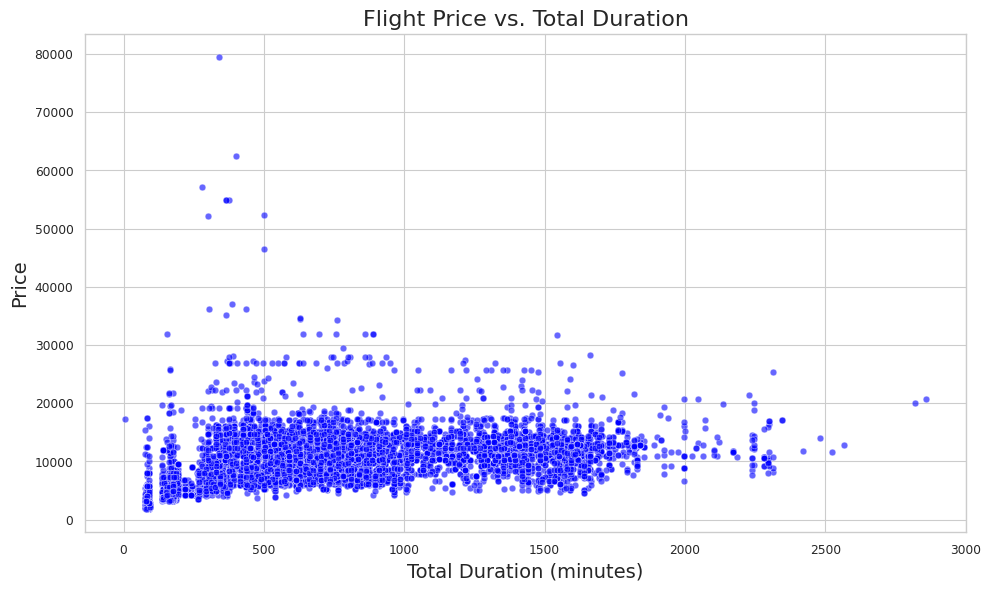

In [161]:
# Set style and context
sns.set_style("whitegrid")
sns.set_context("paper")

# Create scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Duration_total_mins', y='Price', data=df, alpha=0.6, color='blue')

# Add title and labels
plt.title("Flight Price vs. Total Duration", fontsize=16)
plt.xlabel("Total Duration (minutes)", fontsize=14)
plt.ylabel("Price", fontsize=14)

# Show plot
plt.tight_layout()
plt.savefig('flight_price_vs_duration.png')
plt.show()

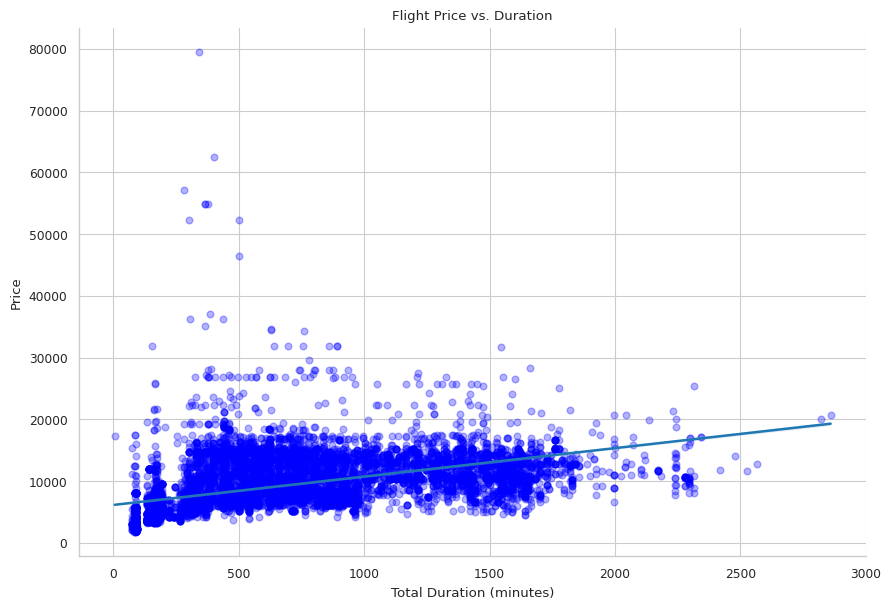

In [162]:
# Create lmplot
sns.lmplot(x="Duration_total_mins", y="Price", data=df, height=6, aspect=1.5, scatter_kws={'alpha':0.3, 'color':'blue'})

# Customize the plot
plt.title("Flight Price vs. Duration")
plt.xlabel("Total Duration (minutes)")
plt.ylabel("Price")
plt.grid(True)

# Show plot
plt.show()

The lmplot function is particularly useful for visualizing the relationship between two variables and determining if there is a linear trend. The regression line fitted to the data helps in understanding the direction and strength of the relationship between the variables.
***For our data as the duration of minutes increases Flight price also increases***


 Now lets understand whether total stops column affect flight price or not

In [163]:
df['Total_Stops']

0        non-stop
1         2 stops
2         2 stops
3          1 stop
4          1 stop
           ...   
10678    non-stop
10679    non-stop
10680    non-stop
10681    non-stop
10682     2 stops
Name: Total_Stops, Length: 10682, dtype: object

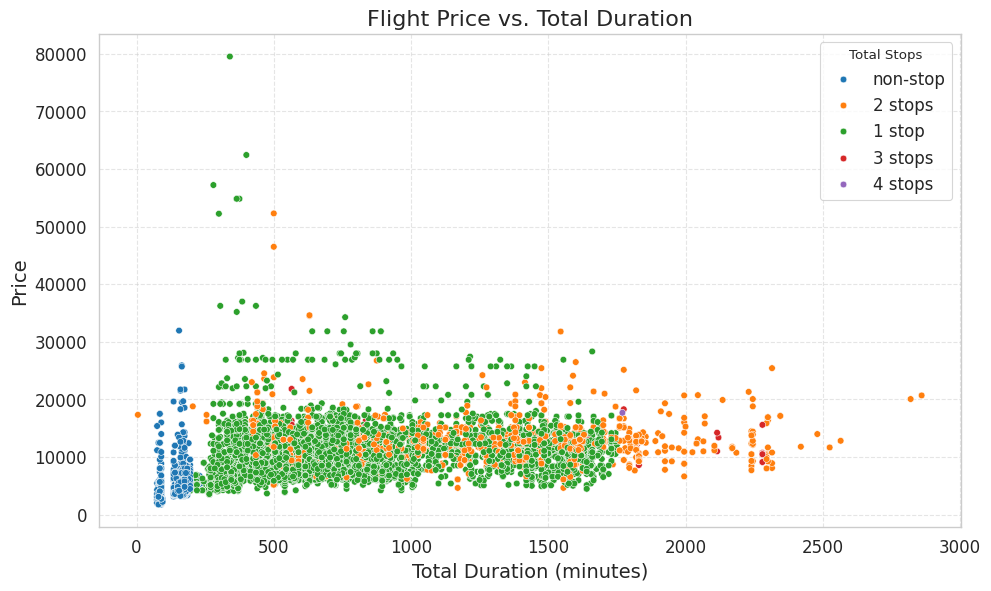

In [164]:
# Create scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Duration_total_mins", y="Price", hue="Total_Stops", data=df)

# Customizing the plot
plt.title("Flight Price vs. Total Duration", fontsize=16)
plt.xlabel("Total Duration (minutes)", fontsize=14)
plt.ylabel("Price", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title="Total Stops", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)

# Show plot
plt.tight_layout()
plt.savefig('flight_price_vs_duration_categories.png')
plt.show()

Non stops flights take less duration time, while their flight price is also low, then as the stops increases, the duration time also increases and flight price also increases for most of the cases


Now let's see on which route Jet Airways is extremely used:

In [165]:
df['Airline']

0             IndiGo
1          Air India
2        Jet Airways
3             IndiGo
4             IndiGo
            ...     
10678       Air Asia
10679      Air India
10680    Jet Airways
10681        Vistara
10682      Air India
Name: Airline, Length: 10682, dtype: object

In [166]:
df['Airline']=='Jet Airways'

0        False
1        False
2         True
3        False
4        False
         ...  
10678    False
10679    False
10680     True
10681    False
10682    False
Name: Airline, Length: 10682, dtype: bool

In [167]:
# Filter data for Jet Airways flights and group by route
jet_airways_routes = df[df['Airline'] == 'Jet Airways'].groupby('Route').size().sort_values(ascending=False)
jet_airways_routes

Route
CCU → BOM → BLR          930
DEL → BOM → COK          875
BLR → BOM → DEL          385
BLR → DEL                382
CCU → DEL → BLR          300
DEL → JAI → BOM → COK    207
BOM → HYD                207
DEL → AMD → BOM → COK    141
DEL → IDR → BOM → COK     86
DEL → NAG → BOM → COK     61
DEL → ATQ → BOM → COK     38
DEL → COK                 34
DEL → BHO → BOM → COK     29
DEL → BDQ → BOM → COK     28
DEL → LKO → BOM → COK     25
DEL → JDH → BOM → COK     23
CCU → GAU → BLR           22
DEL → MAA → BOM → COK     16
DEL → IXC → BOM → COK     13
BLR → MAA → DEL           10
BLR → BDQ → DEL            8
DEL → UDR → BOM → COK      7
BOM → DEL → HYD            5
CCU → BOM → PNQ → BLR      4
BLR → BOM → JDH → DEL      3
DEL → DED → BOM → COK      2
BOM → BDQ → DEL → HYD      2
BOM → IDR → DEL → HYD      1
BOM → VNS → DEL → HYD      1
BOM → DED → DEL → HYD      1
BOM → JDH → DEL → HYD      1
BOM → UDR → DEL → HYD      1
DEL → CCU → BOM → COK      1
dtype: int64

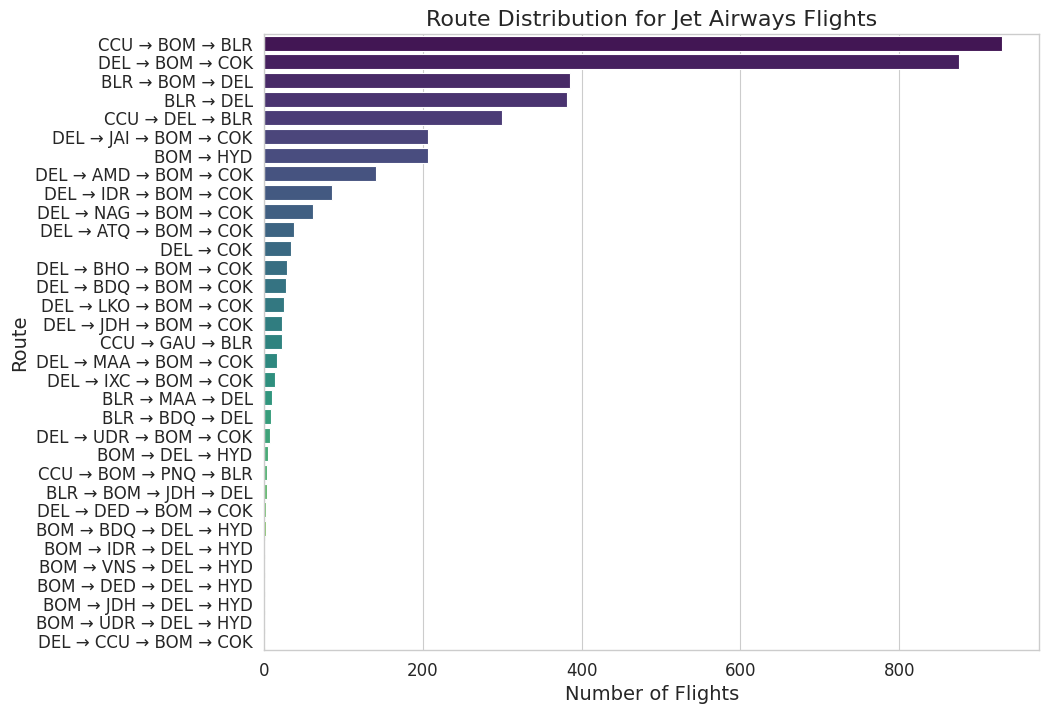

In [168]:
# Plotting
plt.figure(figsize=(10, 8))
sns.barplot(x=jet_airways_routes.values, y=jet_airways_routes.index, palette='viridis')

# Customizing the plot
plt.title("Route Distribution for Jet Airways Flights", fontsize=16)
plt.xlabel("Number of Flights", fontsize=14)
plt.ylabel("Route", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show plot
plt.show()

Now we need to perform Airline vs Price Analysis:

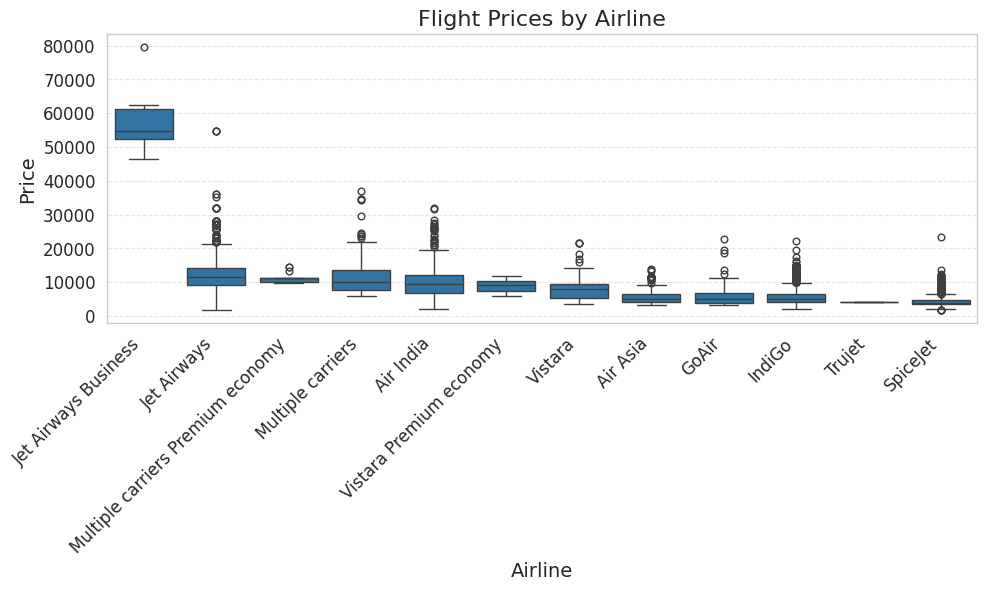

In [169]:
# Sort airlines based on median price
sorted_airlines = df.groupby('Airline')['Price'].median().sort_values(ascending=False).index

# Create boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(y='Price', x='Airline', data=df, order=sorted_airlines)

# Customizing the plot
plt.title("Flight Prices by Airline", fontsize=16)
plt.xlabel("Airline", fontsize=14)
plt.ylabel("Price", fontsize=14)
plt.xticks(rotation=45, fontsize=12, ha='right')  # Rotate x-axis labels for better readability
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Show plot
plt.tight_layout()
plt.show()

From the graph, it's clear that Jet Airways Business has the highest prices compared to other airlines. Additionally, we've noted that, apart from the first airline (Jet Airways Business), most other airlines have similar median prices.

Now we need to apply one-hot Encoding on data

In [170]:
df.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_hour,Duration_minute,Duration_total_mins
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50,170


 This explanation provides a clear distinction between categorical and numerical data, as well as between discrete and continuous numerical data. Here's a summary:

1. **Categorical Data**: Categorical data refers to data that can be grouped into categories or labels. Examples include age groups, educational levels, blood types, etc.

2. **Numerical Data**: Numerical data refers to data that is in the form of numbers. Examples include height, weight, age, etc.

3. **Discrete Data**: Discrete data consists of countable numbers and takes distinct, separate values. Examples include the number of children in a family, the number of items sold, etc.

4. **Continuous Data**: Continuous data represents measurements and can take any value within a given range. Examples include the amount of sugar, temperature of a city, bank balance, etc. Continuous data can have infinite possible values within a range.

This distinction is fundamental in data analysis and modeling, as different techniques are often used to analyze and interpret these types of data.

In [171]:
df.dtypes

Airline                        object
Date_of_Journey        datetime64[ns]
Source                         object
Destination                    object
Route                          object
Duration                       object
Total_Stops                    object
Additional_Info                object
Price                           int64
Journey_day                     int32
Journey_month                   int32
Journey_year                    int32
Dep_Time_hour                   int32
Dep_Time_min                    int32
Arrival_Time_hour               int32
Arrival_Time_min                int32
Duration_hour                   int64
Duration_minute                 int64
Duration_total_mins             int64
dtype: object

In [172]:
cat_col = df.select_dtypes(include='object').columns.tolist()
num_col = df.select_dtypes(exclude='object').columns.tolist()

Clear overview of handling categorical data and introduces two basic encoding techniques:

1. **Nominal Data Encoding**: Nominal data refers to categorical data where the categories do not have any inherent order or ranking. In such cases, the One-Hot Encoding technique is commonly used. One-Hot Encoding converts each category into a binary vector where each element represents the presence or absence of that category.

2. **Ordinal Data Encoding**: Ordinal data refers to categorical data where the categories have a specific order or ranking. In such cases, the Label Encoding technique is used. Label Encoding assigns a unique numerical label to each category based on their order or ranking.


In [173]:
cat_col

['Airline',
 'Source',
 'Destination',
 'Route',
 'Duration',
 'Total_Stops',
 'Additional_Info']

In [174]:
# Perform One-Hot Encoding for the 'Source' column
source_dummies = pd.get_dummies(df['Source'], prefix='Source')
source_dummies

,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,True,False,False,False,False
1,False,False,False,True,False
2,False,False,True,False,False
3,False,False,False,True,False
4,True,False,False,False,False
...,...,...,...,...,...
10678,False,False,False,True,False
10679,False,False,False,True,False
10680,True,False,False,False,False
10681,True,False,False,False,False


In [175]:
# Convert True/False values to 1/0
source_dummies = source_dummies.astype(int)
source_dummies

,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,1,0,0,0,0
1,0,0,0,1,0
2,0,0,1,0,0
3,0,0,0,1,0
4,1,0,0,0,0
...,...,...,...,...,...
10678,0,0,0,1,0
10679,0,0,0,1,0
10680,1,0,0,0,0
10681,1,0,0,0,0


In [176]:
# Concatenate the One-Hot Encoded columns with the original dataframe
df = pd.concat([df, source_dummies], axis=1)
df.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Arrival_Time_hour,Arrival_Time_min,Duration_hour,Duration_minute,Duration_total_mins,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,1,10,2,50,170,1,0,0,0,0


In [177]:
# Drop the original 'Source' column
df.drop('Source', axis=1, inplace=True)

In [178]:
df.head(1)

,Airline,Date_of_Journey,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,...,Arrival_Time_hour,Arrival_Time_min,Duration_hour,Duration_minute,Duration_total_mins,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,IndiGo,2019-03-24,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,...,1,10,2,50,170,1,0,0,0,0


 Lets Perform target guided encoding on Data:


 We will implement target-guided encoding for the 'Airline' column effectively by encoding the airlines based on their mean prices. To make the process more efficient and reusable, you can encapsulate the target-guided encoding logic into a function

In [179]:
def target_guided_encoding(df, column, target):
    '''
    mean_target.index: This retrieves the index of the mean_target series, which contains the categories (in this case, airline names)
    sorted by their mean target values.

    enumerate(mean_target.index): This pairs each category with its corresponding index. The enumerate() function returns an iterable
    where each element is a tuple containing the index and the value from mean_target.index.

    {category: index for index, category in enumerate(mean_target.index)}: This constructs a dictionary comprehension
    where each category is mapped to its index. The category represents the value (airline name) and the index represents
    its position in the sorted list of categories.
    '''
    # Calculate mean target value for each category
    mean_target = df.groupby(column)[target].mean().sort_values()

    # Create a dictionary mapping each category to its mean target value
    encoding_dict = {category: index for index, category in enumerate(mean_target.index)}

    # Map categories to their mean target values
    df[column] = df[column].map(encoding_dict)

    return df

# Apply target-guided encoding to the 'Airline' column
df = target_guided_encoding(df, 'Airline', 'Price')

In [180]:
df.head(1)

,Airline,Date_of_Journey,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,...,Arrival_Time_hour,Arrival_Time_min,Duration_hour,Duration_minute,Duration_total_mins,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,3,2019-03-24,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,...,1,10,2,50,170,1,0,0,0,0


Now let's perform Target Guided Mean encoding on 'Destination':

Till now , Delhi has only one Airport which is IGI & its second Airport is yet to build in Greater Noida (Jewar), which is neighbouring part of Delhi, so we will consider New Delhi & Delhi as same but in future,these conditions may change..

In [181]:
df['Destination']

0        New Delhi
1         Banglore
2           Cochin
3         Banglore
4        New Delhi
           ...    
10678     Banglore
10679     Banglore
10680        Delhi
10681    New Delhi
10682       Cochin
Name: Destination, Length: 10682, dtype: object

In [182]:
# Replace 'New Delhi' with 'Delhi' in the 'Destination' column
df['Destination'].replace('New Delhi', 'Delhi', inplace=True)

# Group destinations by mean price and sort them
destinations = df.groupby(['Destination'])['Price'].mean().sort_values().index

# Create a dictionary to map each destination to its index based on mean price
destination_dict = {destination: index for index, destination in enumerate(destinations, 0)}

# Map destinations to their index in the dictionary
df['Destination'] = df['Destination'].map(destination_dict)

# Display the updated dataframe
df.head(2)


,Airline,Date_of_Journey,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,...,Arrival_Time_hour,Arrival_Time_min,Duration_hour,Duration_minute,Duration_total_mins,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,3,2019-03-24,2,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,...,1,10,2,50,170,1,0,0,0,0
1,7,2019-05-01,3,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,...,13,15,7,25,445,0,0,0,1,0


Let's perform Label (Manual) Encoding on 'Total_Stops'

In [183]:
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [184]:
# Perform label encoding for 'Total_Stops' column
stops_mapping = {'non-stop': 0, '1 stop': 1, '2 stops': 2, '3 stops': 3, '4 stops': 4}
df['Total_Stops'] = df['Total_Stops'].map(stops_mapping)

# Display the encoded 'Total_Stops' column
df['Total_Stops']

0        0
1        2
2        2
3        1
4        1
        ..
10678    0
10679    0
10680    0
10681    0
10682    2
Name: Total_Stops, Length: 10682, dtype: int64

Let's remove all unnecessary features

In [185]:
# Display the columns before dropping unnecessary features
df.columns

Index(['Airline', 'Date_of_Journey', 'Destination', 'Route', 'Duration',
       'Total_Stops', 'Additional_Info', 'Price', 'Journey_day',
       'Journey_month', 'Journey_year', 'Dep_Time_hour', 'Dep_Time_min',
       'Arrival_Time_hour', 'Arrival_Time_min', 'Duration_hour',
       'Duration_minute', 'Duration_total_mins', 'Source_Banglore',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai'],
      dtype='object')

In [186]:
# Remove unnecessary features
df.drop(columns=['Date_of_Journey', 'Additional_Info', 'Duration_total_mins', 'Journey_year'], axis=1, inplace=True)

In [187]:
# Drop the 'Route' column
df.drop(columns=['Route'], axis=1, inplace=True)

In [188]:
# Drop the 'Duration' column
df.drop(columns=['Duration'], axis=1, inplace=True)

In [189]:
df.head(3)

,Airline,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_hour,Duration_minute,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,3,2,0,3897,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,3,2,7662,1,5,5,50,13,15,7,25,0,0,0,1,0
2,10,4,2,13882,9,6,9,25,4,25,19,0,0,0,1,0,0


Now Let's Perform outlier detection and Deal with it

In [190]:
def visualize_outliers(df, col):
    """
    Visualize outliers using distribution plot, box plot, and histogram.
    """
    fig, axes = plt.subplots(3, 1, figsize=(10, 8))

    # Distribution plot
    sns.distplot(df[col], ax=axes[0])
    axes[0].set_title('Distribution Plot for ' + col)
    axes[0].set_xlabel(col)
    axes[0].set_ylabel('Density')

    # Box plot
    sns.boxplot(df[col], ax=axes[1])
    axes[1].set_title('Box Plot for ' + col)
    axes[1].set_xlabel(col)
    axes[1].set_ylabel('')

    # Histogram
    sns.histplot(df[col], ax=axes[2], kde=False)
    axes[2].set_title('Histogram for ' + col)
    axes[2].set_xlabel(col)
    axes[2].set_ylabel('Frequency')

    plt.tight_layout()
    plt.show()


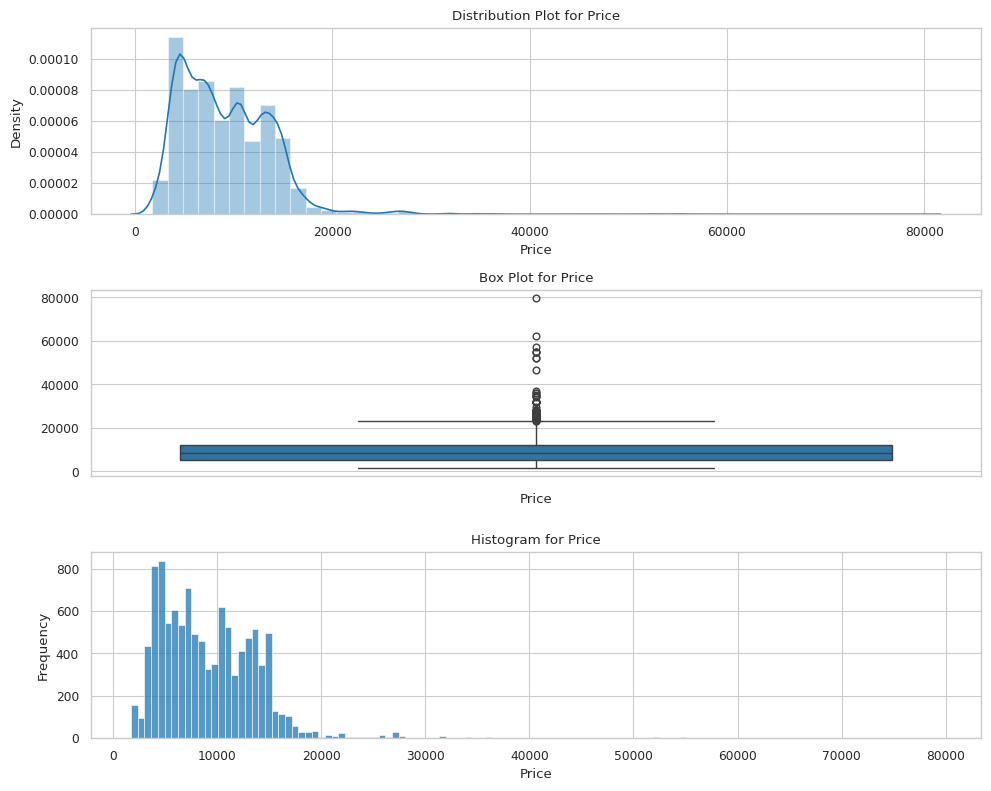

In [191]:
# Visualize outliers for 'Price'
visualize_outliers(df, 'Price')

In [192]:
# Calculate the interquartile range (IQR)
q1 = df['Price'].quantile(0.25)
q3 = df['Price'].quantile(0.75)
iqr = q3 - q1

# Define the upper and lower bounds for outliers
maximum = q3 + 1.5 * iqr
minimum = q1 - 1.5 * iqr

print("Maximum:", maximum)
print("Minimum:", minimum)

Maximum: 23017.0
Minimum: -5367.0


In [193]:
# Identify and print outliers
outliers = [price for price in df['Price'] if price > maximum or price < minimum]
print("Outliers:", outliers)
print("Number of outliers:", len(outliers))

Outliers: [27430, 36983, 26890, 26890, 25139, 27210, 52229, 26743, 26890, 25735, 27992, 26890, 26890, 23583, 26890, 23533, 24115, 25735, 54826, 31783, 27992, 26890, 26890, 25430, 36235, 27210, 26890, 25735, 54826, 26890, 35185, 79512, 28097, 27992, 26890, 25735, 26092, 31825, 25913, 25735, 27992, 31825, 23267, 62427, 54826, 31825, 25430, 26890, 36235, 23843, 26890, 25735, 28322, 25735, 25735, 31825, 26890, 27992, 34273, 46490, 29528, 26890, 26890, 26890, 34503, 26890, 27992, 26890, 26890, 23170, 24528, 26890, 27992, 25735, 34608, 25703, 26890, 23528, 31825, 27282, 25735, 27992, 52285, 24017, 31945, 26890, 24318, 23677, 27992, 24210, 57209, 26890, 31825, 26480]
Number of outliers: 94


In [194]:
# Replace outliers with the median of Price if greater than 35K
df['Price'] = np.where(df['Price'] >= 35000, df['Price'].median(), df['Price'])
df['Price']

0         3897.0
1         7662.0
2        13882.0
3         6218.0
4        13302.0
          ...   
10678     4107.0
10679     4145.0
10680     7229.0
10681    12648.0
10682    11753.0
Name: Price, Length: 10682, dtype: float64

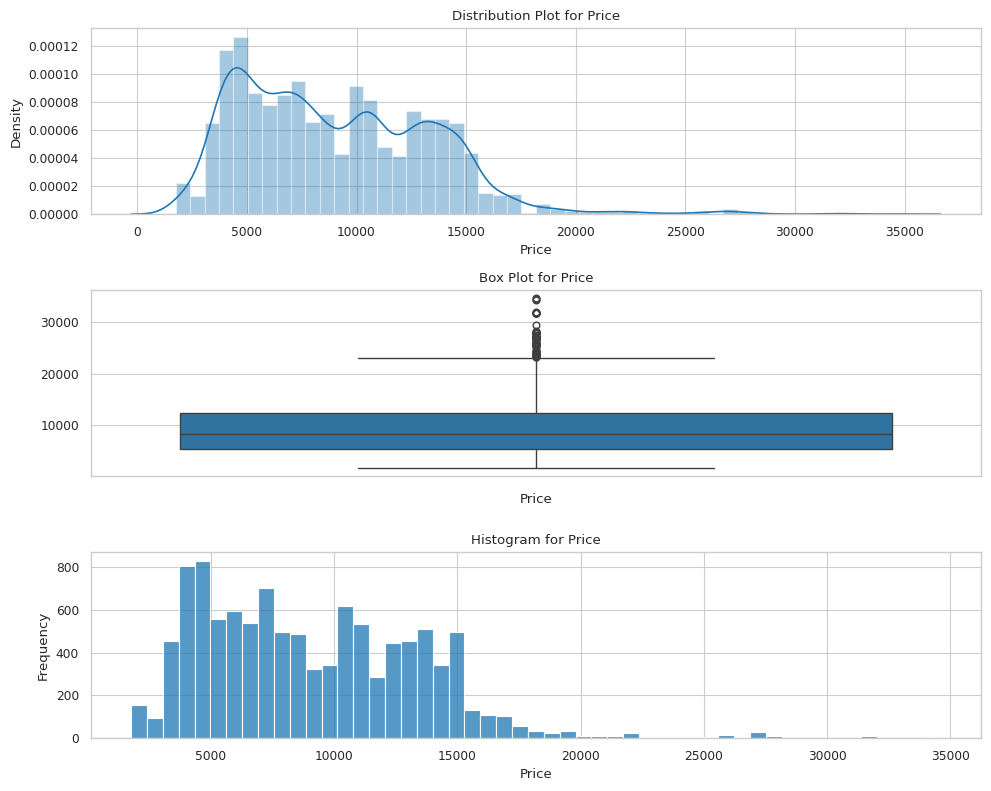

In [195]:
# Visualize outliers after handling
visualize_outliers(df, 'Price')

Feature Selection

Feature selection is crucial in machine learning to identify relevant features that contribute significantly to predicting the target variable. It helps in improving model performance, reducing overfitting, and enhancing interpretability. Common techniques include filter methods, wrapper methods, embedded methods, and dimensionality reduction techniques like PCA. By selecting the most relevant features, we can build simpler and more accurate models.

In [196]:
from sklearn.feature_selection import mutual_info_regression

In [197]:
X = df.drop(['Price'], axis=1)
y = df['Price']

In [198]:
# Calculate mutual information
imp = mutual_info_regression(X, y)
imp

array([0.97608557, 0.99794838, 0.79164023, 0.23549463, 0.63947456,
       0.33813323, 0.25642197, 0.40985863, 0.34356875, 0.42085421,
       0.33680566, 0.39827777, 0.13526977, 0.52214606, 0.4477921 ,
       0.20276868])

In [199]:
# Create DataFrame to visualize feature importance
imp_df = pd.DataFrame(imp, index=X.columns, columns=['Importance'])
imp_df

,Importance
Airline,0.976086
Destination,0.997948
Total_Stops,0.791640
Journey_day,0.235495
Journey_month,0.639475
Dep_Time_hour,0.338133
Dep_Time_min,0.256422
Arrival_Time_hour,0.409859
Arrival_Time_min,0.343569
Duration_hour,0.420854


In [200]:
# Sort features by importance
imp_df_sorted = imp_df.sort_values(by='Importance', ascending=False)
imp_df_sorted

,Importance
Destination,0.997948
Airline,0.976086
Total_Stops,0.791640
Journey_month,0.639475
Source_Delhi,0.522146
Source_Kolkata,0.447792
Duration_hour,0.420854
Arrival_Time_hour,0.409859
Source_Banglore,0.398278
Arrival_Time_min,0.343569


# 5. Building a Machine Learning Model

In [201]:
# First, We split the dataset into training and testing sets to evaluate the model's performance
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=42)

In [202]:
# Initially, we'll create a basic model and later improve it using parameter tuning
from sklearn.ensemble import RandomForestRegressor

# Initialize and fit the model
ml_model = RandomForestRegressor()
ml_model.fit(X_train, y_train)

RandomForestRegressor()

In [203]:
# We make predictions using the trained model on the test data
y_pred = ml_model.predict(X_test)
y_pred

array([16825.93      ,  5595.68      ,  8862.37      , ...,
        6614.06      , 12929.12309524, 13028.72052381])

In [204]:
# We evaluate the model's performance using metrics such as R-squared score.
from sklearn import metrics

r2_score = metrics.r2_score(y_test, y_pred)
r2_score

0.8188764265606983

In [205]:
# We can save the trained model for future use, allowing us to make predictions on new data efficiently.
import pickle

# Save the model to a file
with open('rf_random.pkl', 'wb') as file:
    pickle.dump(ml_model, file)

# Load the saved model
with open('rf_random.pkl', 'rb') as model:
    forest = pickle.load(model)


# 6. Automate ML Pipeline

In [206]:
# Defining Custom Evaluation Metric (Mean Absolute Percentage Error (MAPE))

def mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Calculate MAPE
mape_score = mape(y_test, y_pred)
print("MAPE Score:", mape_score)

MAPE Score: 13.14252623691602


Training score : 0.9505074212639562
Predictions are : [16835.03        5342.67        8910.34       ...  6585.24
 12607.61083333 13376.68383333]


R-squared Score : 0.8202436740164673
MAE : 1173.5610630048734
MSE : 3619446.332777894
RMSE : 1902.4842529645007
MAPE : 13.070822481527184


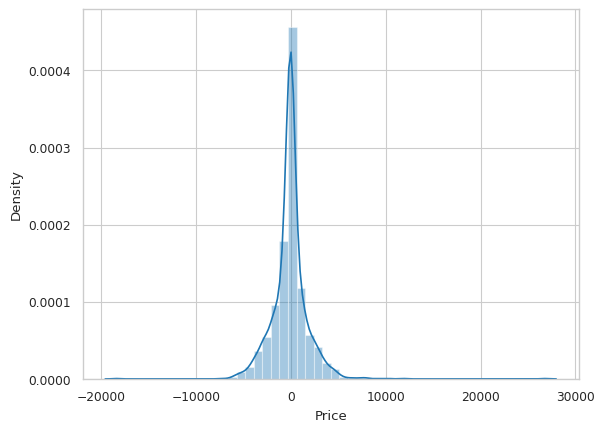

In [207]:
# Automating ML Pipeline
def predict(ml_model):
    model = ml_model.fit(X_train, y_train)
    print('Training score : {}'.format(model.score(X_train, y_train)))

    y_prediction = model.predict(X_test)
    print('Predictions are : {}'.format(y_prediction))
    print('\n')

    r2_score = metrics.r2_score(y_test, y_prediction)
    print('R-squared Score : {}'.format(r2_score))

    print('MAE : {}'.format(metrics.mean_absolute_error(y_test, y_prediction)))
    print('MSE : {}'.format(metrics.mean_squared_error(y_test, y_prediction)))
    print('RMSE : {}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_prediction))))
    print('MAPE : {}'.format(mape(y_test, y_prediction)))

    sns.distplot(y_test - y_prediction)

# Example usage with RandomForestRegressor
predict(RandomForestRegressor())


# 7. Hypertune ML Model along with Cross Validation:

In [208]:
# Hyperparameter Tuning (RandomizedSearchCV with RandomForestRegressor)

from sklearn.model_selection import RandomizedSearchCV

reg_rf = RandomForestRegressor()

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start=100, stop=1200, num=6)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num=4)]
# Minimum number of samples required to split a node
min_samples_split = [5, 10, 15, 100]

# Define hyperparameter space
random_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split
}

# Randomized search
rf_random = RandomizedSearchCV(estimator=reg_rf, param_distributions=random_grid, cv=3, n_jobs=-1, verbose=2)
rf_random.fit(X_train, y_train)

# Get best parameters and score
print("Best Parameters:", rf_random.best_params_)
print("Best Score:", rf_random.best_score_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters: {'n_estimators': 760, 'min_samples_split': 5, 'max_features': 'sqrt', 'max_depth': 21}
Best Score: 0.8048025577233163


In [209]:
# # GridSearchCV for hyperparameter tunin
# from sklearn.model_selection import GridSearchCV
# from sklearn.ensemble import RandomForestRegressor

# # Create RandomForestRegressor object
# reg_rf = RandomForestRegressor()

# # Define hyperparameter space
# param_grid = {
#     'n_estimators': [100, 320, 540, 760, 980, 1200],
#     'max_features': ['auto', 'sqrt'],
#     'max_depth': [5, 13, 21, 30],
#     'min_samples_split': [5, 10, 15, 100]
# }

# # Grid search
# grid_search = GridSearchCV(estimator=reg_rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
# grid_search.fit(X_train, y_train)

# # Best parameters and best score
# print("Best parameters:", grid_search.best_params_)
# print("Best score:", grid_search.best_score_)